## Introduction:  
<a> In this notebook it is aimed to execute the following steps.</a>
- <a> Data Understanding </a>
- <a> Data preparation to Modeling</a>
- <a> Implementing a Simple Logistic Model</a>

NOTE: This notebook prepared for studying Data Analysis. I will be grateful if you feedback.

# Analysis of Terrorist Acts in Colombia (1970-2017)
## A. About Terrorism:
There are various different definitions of terrorism, with no universal agreement about it. Terrorism is a charged term. It is often used with the connotation of something that is "morally wrong". Governments and non-state groups use the term to abuse or denounce opposing groups. Varied political organizations have been accused of using terrorism to achieve their objectives. These include right-wing and left-wing political organizations, nationalist groups, religious groups, revolutionaries and ruling governments. Legislation declaring terrorism a crime has been adopted in many states. When terrorism is perpetrated by nation states, it is not considered terrorism by the state conducting it, making legality a largely grey-area issue. There is no consensus as to whether or not terrorism should be regarded as a war crime.

In this kernel we will try to analyze the terrorism acts in Colombia between 1970-2017.

Terrorism in Colombia has occurred repeatedly for the last several decades, largely in part due to the ongoing armed conflict the country has been involved in since 1964. Perpetrators of terrorist acts in the country range from leftist guerilla forces such as the FARC, ELN and M-19, to drug cartels such as the Medellín Cartel, to right-wing paramilitary forces such as the AUC.

## B. Terror Groups in Colombia:
Notable groups involve in terror attacks include:

* Revolutionary Armed Forces of Colombia (FARC)
* National Liberation Army (ELN)
* 19th of April Movement (M19)
* Medellin Cartel
* AUC

## C. Counterterrorism Efforts:
In recent years, the number of known and suspected terrorists killed, captured, or surrendered fell as terror groups changed their tactics, while casualties rose. The Revolutionary Armed Forces of Colombia (FARC) reverted to hit and run attacks rather than engage in large unit encounters.

In November, 2011, security forces killed FARC leader Guillermo León Sáenz Vargas, also known as "Alfonso Cano".

## D. Demobilization and Reintegration Efforts:
Colombia has employed a multi-agency approach to countering radicalization and discouraging violent extremism. The government's program focuses on encouraging individual members units of the FARC and ELN to demobilize and reintegrate into society. Demobilization and reintegration programs provide medical care, psychological counseling, education benefits, and job placement assistance. Recidivism rates were estimated at between 10 and 20 percent by the Colombian Agency for Reintegration. Additionally, the Ministry of Defense has organized a number of public festivals and social events with celebrity participation to discourage the recruitment of vulnerable youth.

In 2013, a total of 1,350 FARC and ELN members had demobilized.

## Content:

- <a href='#1.'> 1. Importing Libraries</a>
- <a href='#2.'> 2. Loading and Checking Data</a>
- <a href='#3.'>3. Variable Description</a>
  - <a href='#3.1.'>3.1. Univariate Variable Description</a>
  - <a href='#3.2.'>3.2. Categorical Variable Description</a>
  - <a href='#3.3.'>3.3. Numerical Description</a>
- <a href='#4.'> 4. Explatory Data Analysis</a>
- <a href='#5.'> 5. Outlier Detection</a>
- <a href='#6.'>6. Missing Values</a>
  - <a href='#6.1.'>6.1. Finding Missing Values</a>
  - <a href='#6.2.'>6.2. Filling Missing Values</a>
- <a href='#7.'>7. Feature Engineering</a>
  - <a href='#7.1.'>7.1. Over-sampling using SMOTE</a>
  - <a href='#7.2.'>7.2. Recursive Feature Elimination</a>
- <a href='#8.'>8. Modelling: Logistic Regression</a>
  - <a href='#8.1.'>8.1. Logistic Regression Model Fitting</a>
  - <a href='#8.2.'>8.2. Confusion Matrix</a>
  - <a href='#8.3.'>8.3. ROC Curve</a>
- <a href='#9.'>9. References</a>

## <a id='1.'>1. Importing Libraries</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from imageio import imread
import codecs
from subprocess import check_output
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from collections import Counter

## <a id='2.'>2. Loading and Checking The Data</a>

In [2]:
df = pd.read_csv("D:\ML\Terrorist Attack Prediction\Dataset\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [3]:
# I will filter and rename th columns that I will work with.
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'countryName','attacktype1_txt':'attackType',\
                   'target1':'target','nkill':'killed','nwound':'wounded','summary':'summary','gname':'group','targtype1_txt':'targetType',\
                   'weaptype1_txt':'weaponType','motive':'motive'},inplace=True)
df=df[['year','month','day','countryName', 'city','latitude','longitude','attackType','killed','wounded','target','summary','group','targetType',\
       'weaponType','motive']]
df.head()

,year,month,day,countryName,city,latitude,longitude,attackType,killed,wounded,target,summary,group,targetType,weaponType,motive
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


This dataframe contains all the terrorism acts around the world between 1970-2017. I will work on the Colombia part. So I will filter the dataset.

In [4]:
df_colombia=df[df["countryName"] == 'Colombia']
df_colombia.head()

,year,month,day,countryName,city,latitude,longitude,attackType,killed,wounded,target,summary,group,targetType,weaponType,motive
405,1970,7,10,Colombia,Manizales,5.059097,-75.505960,Hostage Taking (Kidnapping),NaN,NaN,"Fernand Londono, former cabinet minister",NaN,Unknown,Government (General),Unknown,NaN
1392,1972,7,17,Colombia,Bogota,4.594635,-74.093737,Assassination,1.0,0.0,"First Secretary, Swedish Embassy, Kjeil R. Hac...",NaN,Unknown,Government (Diplomatic),Firearms,NaN
1640,1972,12,0,Colombia,Medellin,6.242026,-75.564766,Hostage Taking (Kidnapping),0.0,0.0,"Jairo Duque Perez and associate, ex dean, law ...",NaN,National Liberation Army of Colombia (ELN),Educational Institution,Unknown,NaN
1690,1973,0,0,Colombia,unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,"Alirio Serrano Sanchez, rancher",NaN,National Liberation Army of Colombia (ELN),Business,Unknown,NaN
1697,1973,1,6,Colombia,Ayapel,8.312931,-75.142561,Hostage Taking (Kidnapping),NaN,NaN,"Armando Mora de la Hoz, rancher *",NaN,Popular Liberation Army (EPL),Business,Unknown,NaN


In [5]:
df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8306 entries, 405 to 181516
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8306 non-null   int64  
 1   month        8306 non-null   int64  
 2   day          8306 non-null   int64  
 3   countryName  8306 non-null   object 
 4   city         8306 non-null   object 
 5   latitude     7835 non-null   float64
 6   longitude    7835 non-null   float64
 7   attackType   8306 non-null   object 
 8   killed       7848 non-null   float64
 9   wounded      7722 non-null   float64
 10  target       8289 non-null   object 
 11  summary      2313 non-null   object 
 12  group        8306 non-null   object 
 13  targetType   8306 non-null   object 
 14  weaponType   8306 non-null   object 
 15  motive       1549 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 1.1+ MB


In [6]:
df_colombia.describe()

,year,month,day,latitude,longitude,killed,wounded
count,8306.000000,8306.000000,8306.000000,7835.000000,7835.000000,7848.000000,7722.000000
mean,1993.928485,6.534794,15.126053,5.598698,-74.789142,1.872834,1.337477
std,10.401173,3.398169,8.668592,2.439083,1.554125,5.641414,6.886977
min,1970.000000,0.000000,0.000000,-24.472445,-78.792429,0.000000,0.000000
25%,1986.000000,4.000000,8.000000,3.985581,-75.694558,0.000000,0.000000
50%,1992.000000,7.000000,15.000000,6.153669,-75.154538,0.000000,0.000000
75%,2000.000000,9.000000,22.000000,7.073654,-73.853115,2.000000,0.000000
max,2017.000000,12.000000,31.000000,12.240833,-55.696772,275.000000,250.000000


In [7]:
df_colombia.columns

Index(['year', 'month', 'day', 'countryName', 'city', 'latitude', 'longitude',
       'attackType', 'killed', 'wounded', 'target', 'summary', 'group',
       'targetType', 'weaponType', 'motive'],
      dtype='object')

In [8]:
df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8306 entries, 405 to 181516
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8306 non-null   int64  
 1   month        8306 non-null   int64  
 2   day          8306 non-null   int64  
 3   countryName  8306 non-null   object 
 4   city         8306 non-null   object 
 5   latitude     7835 non-null   float64
 6   longitude    7835 non-null   float64
 7   attackType   8306 non-null   object 
 8   killed       7848 non-null   float64
 9   wounded      7722 non-null   float64
 10  target       8289 non-null   object 
 11  summary      2313 non-null   object 
 12  group        8306 non-null   object 
 13  targetType   8306 non-null   object 
 14  weaponType   8306 non-null   object 
 15  motive       1549 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 1.1+ MB


## <a id='3.'>3. Variable Description</a>

* year: year of the act. (numerical)
* month: month number of the act. (numerical)
* day: day number of the act. (numerical)
* countryName: Country name. (object)
* city: The city where the act executed. (categorical)
* latitude: Coordinate of the crime scene. (coordination)
* longitude:Coordinate of the crime scene. (coordination) 
* attackType: The type of the act (Bombing/Explosion, Armed Assault, Facility/Infrastructure Attack, Hostage Taking (Kidnapping),
Hijacking, Assassination, Unknown, Hostage Taking (Barricade Incident), Unarmed Assault) (categorical)
* killed: Number of the people that died in the act. (numerical)
* wounded: Number of the people that wounded in the act. (numerical)
* target: The name of the target. (object)
* summary: A short description of the act. (object)
* group: The terrorist group that executed the terrorist act. (categorical)
* targetType: Target type. (Airports & Aircraft, Military, Government (Diplomatic), Business, Police, Government (General),
Private Citizens & Property, Educational Institution, Journalists & Media, Violent Political Party, Tourists, Transportation, Utilities, 
NGO, Unknown, Religious Figures/Institutions, Telecommunication, Food or Water Supply, Maritime, Terrorists/Non-State Militia, Other) (categorical)
* weaponType: The type of the weapon used in the act. (Explosives, Incendiary, Firearms, Unknown, Melee, Chemical, Fake Weapons,
Sabotage Equipment, Other) (categorical)
* motive: The motivation behind the act. (object)


* float64(4): latitude, longitude, killed, wounded.
* int64(3): year, month, day.
* objects(9): countryName, city, attackType, target, targetType, summary, group, weaponType, motive.

## <a id='3.1.'>3.1. Univariate Variable Analysis</a>

* Categorical Variable Analysis: attackType, targetType, group, weaponType,
* Numerical Variable Analysis: year, month, day, killed, wounded, latitude, longitude

## <a id='3.2.'>3.2. Categorical Variable Analysis</a>

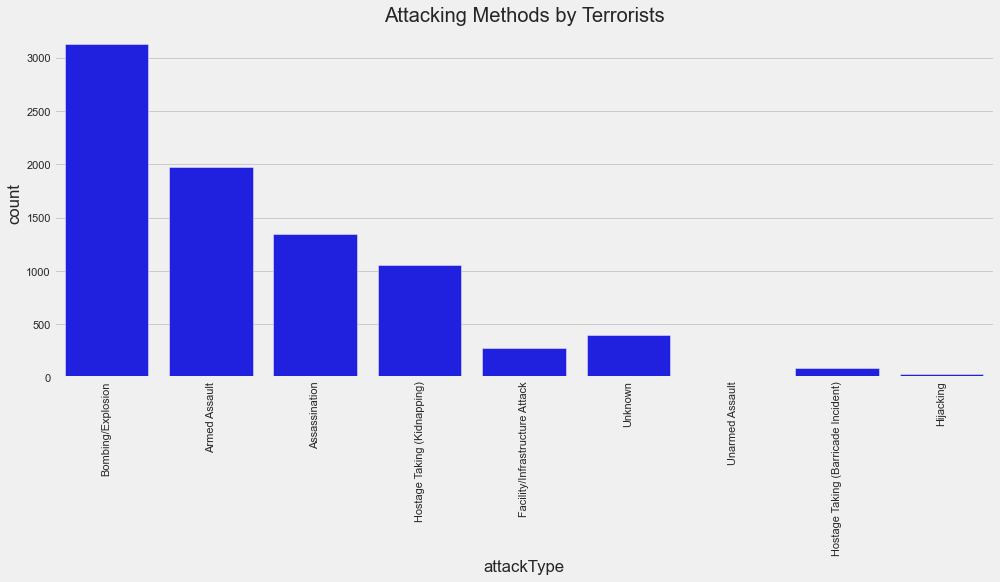

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('attackType',data=df_colombia,color='blue',order=df['attackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

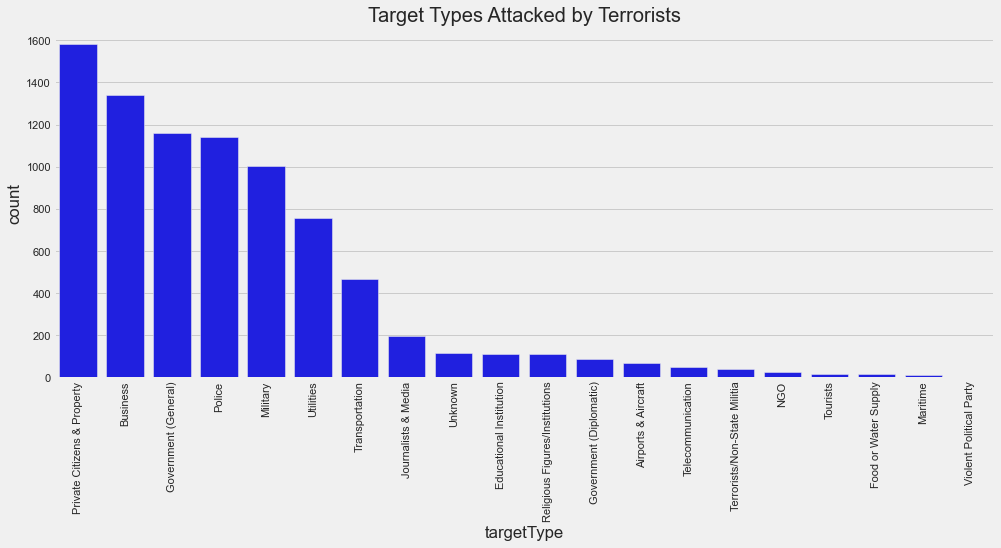

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(df_colombia['targetType'],color='blue',order=df_colombia['targetType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target Types Attacked by Terrorists')
plt.show()

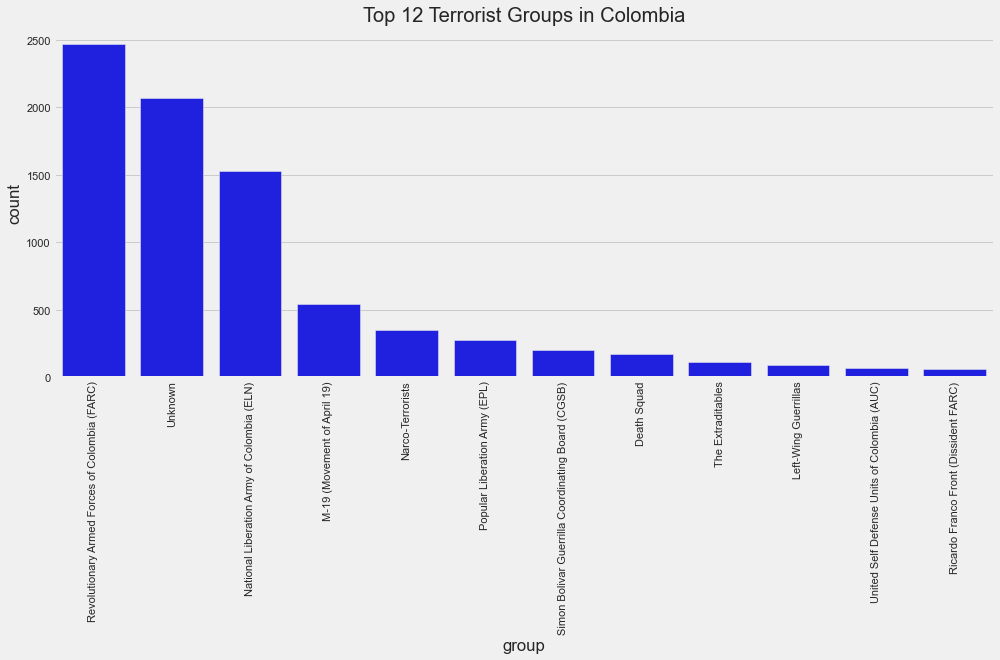

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('group',data=df_colombia,color='blue',order=df_colombia['group'].value_counts().iloc[:12].index)
plt.xticks(rotation=90)
plt.title('Top 12 Terrorist Groups in Colombia')
plt.show()

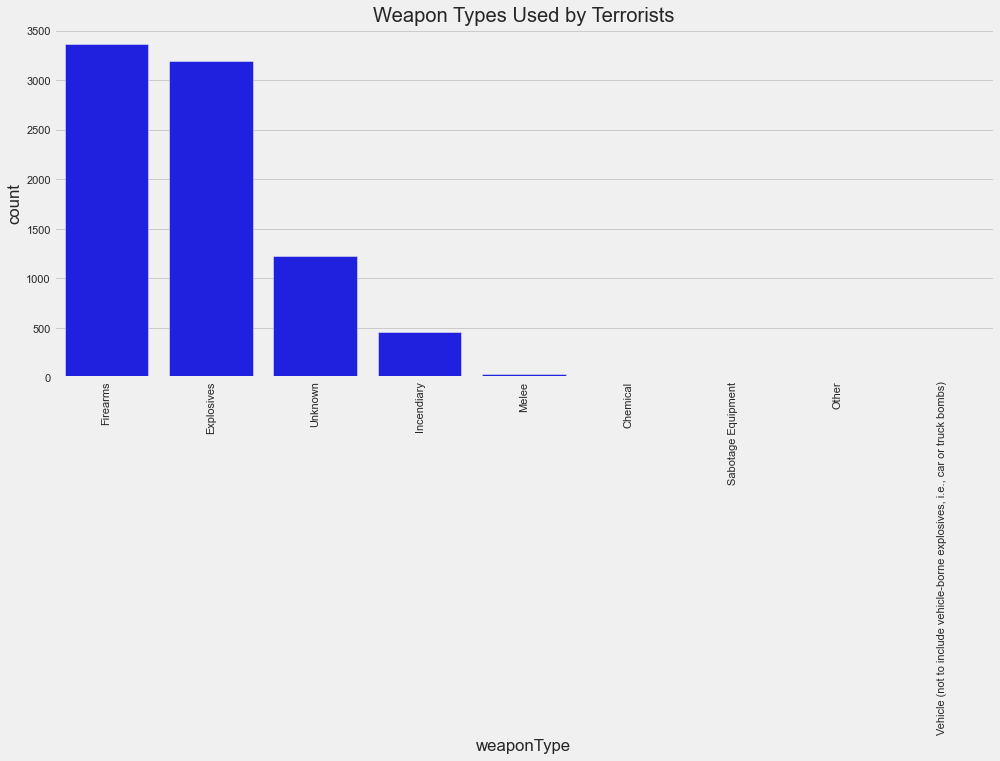

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot(df_colombia['weaponType'],color='blue',order=df_colombia['weaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Weapon Types Used by Terrorists')
plt.show()

## <a id='3.3.'>3.3. Numerical Variable Analysis</a>

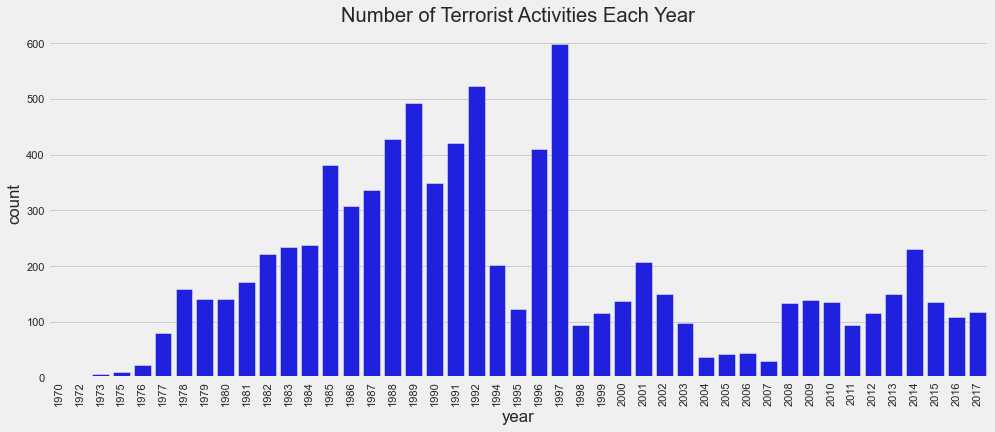

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot("year", data=df_colombia, color='blue')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

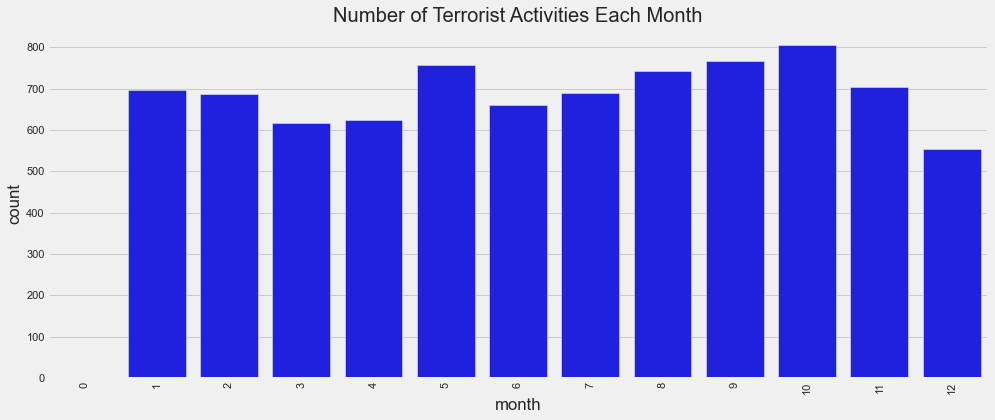

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot("month", data=df_colombia,color='blue')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Month')
plt.show()

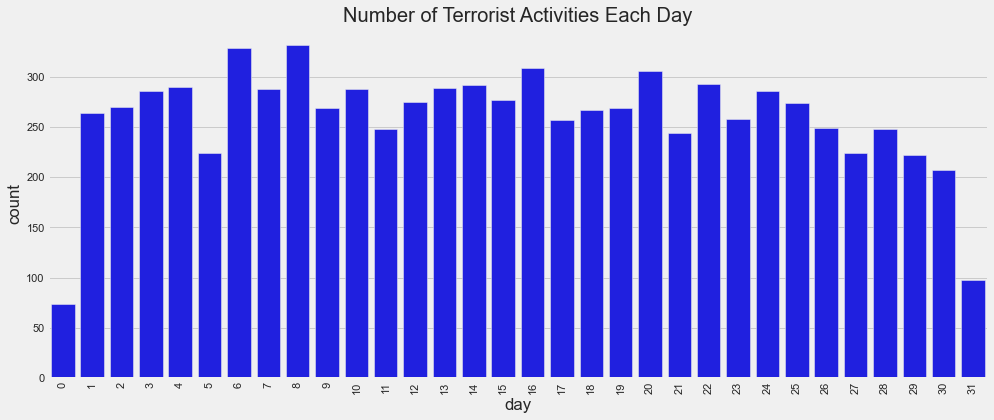

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot("day", data=df_colombia,color='blue')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Day')
plt.show()

## <a id='4.'>4. Explatory Data Analysis</a>

In [16]:
year_list = list(df_colombia['year'].unique())
totalKilled = []
totalWounded = []
totalAct = []

In [17]:
for i in year_list:
    x = df_colombia[df_colombia['year'] == i]
    TotalKilled = x.killed.sum()    
    totalKilled.append(TotalKilled)    
    TotalWounded = x.wounded.sum()    
    totalWounded.append(TotalWounded)
    
    totalAct.append(df_colombia.year[df_colombia.year == i].count())

In [18]:
data_killed_wounded = pd.DataFrame({'year': year_list, 'killed': totalKilled, 'wounded':totalWounded, "totalActs": totalAct})
data_killed_wounded.head(10)

,year,killed,wounded,totalActs
0,1970,0.0,0.0,1
1,1972,1.0,0.0,2
2,1973,0.0,0.0,6
3,1975,7.0,0.0,10
4,1976,10.0,13.0,22
5,1977,38.0,29.0,80
6,1978,71.0,23.0,158
7,1979,156.0,54.0,140
8,1980,159.0,32.0,141
9,1981,365.0,49.0,172


In [19]:
data_killed_wounded.tail()

,year,killed,wounded,totalActs
40,2013,137.0,263.0,149
41,2014,143.0,314.0,231
42,2015,104.0,138.0,136
43,2016,52.0,72.0,109
44,2017,84.0,117.0,117


In [20]:
data_killed_wounded.fillna(0.0, inplace=True)

In [21]:
sum_column = data_killed_wounded["killed"] + data_killed_wounded["wounded"]
data_killed_wounded["totalCasualties"] = sum_column

In [22]:
data_killed_wounded.head()

,year,killed,wounded,totalActs,totalCasualties
0,1970,0.0,0.0,1,0.0
1,1972,1.0,0.0,2,1.0
2,1973,0.0,0.0,6,0.0
3,1975,7.0,0.0,10,7.0
4,1976,10.0,13.0,22,23.0


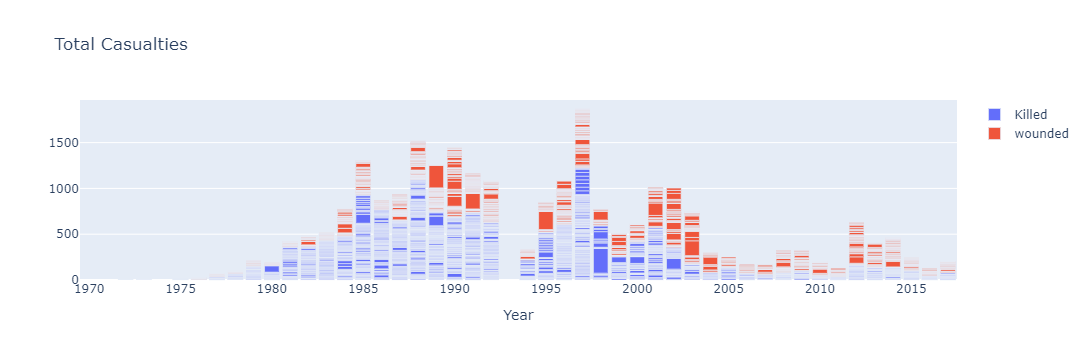

In [23]:
trace1 = {
  'x': df_colombia.year,
  'y': df_colombia.killed,
  'name': 'Killed',
  'type': 'bar'
};
trace2 = {
  'x': df_colombia.year,
  'y': df_colombia.wounded,
  'name': 'wounded',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Year'},
  'barmode': 'relative',
  'title': 'Total Casualties'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

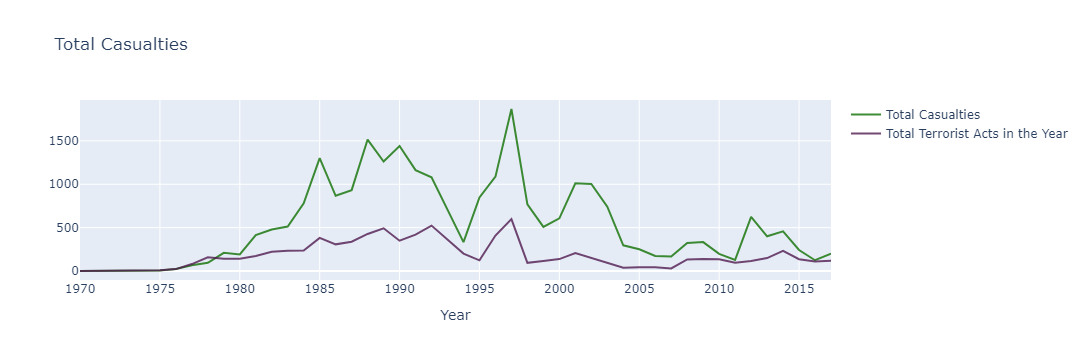

In [24]:
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Scatter(
                    x = data_killed_wounded.year,
                    y = data_killed_wounded.totalCasualties,
                    mode = "lines",
                    name = "Total Casualties",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= data_killed_wounded.totalCasualties)
# Creating trace2
trace2 = go.Scatter(
                    x = data_killed_wounded.year,
                    y = data_killed_wounded.totalActs,
                    mode = "lines",
                    name = "Total Terrorist Acts in the Year",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= data_killed_wounded.totalActs)
data = [trace1, trace2]
layout = dict(title = 'Total Casualties',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [27]:
df_colombia.group.value_counts().iloc[:14]

Revolutionary Armed Forces of Colombia (FARC)        2468
Unknown                                              2070
National Liberation Army of Colombia (ELN)           1529
M-19 (Movement of April 19)                           543
Narco-Terrorists                                      349
Popular Liberation Army (EPL)                         272
Simon Bolivar Guerrilla Coordinating Board (CGSB)     202
Death Squad                                           171
The Extraditables                                     109
Left-Wing Guerrillas                                   90
United Self Defense Units of Colombia (AUC)            65
Ricardo Franco Front (Dissident FARC)                  62
Paramilitaries                                         37
Gunmen                                                 24
Name: group, dtype: int64

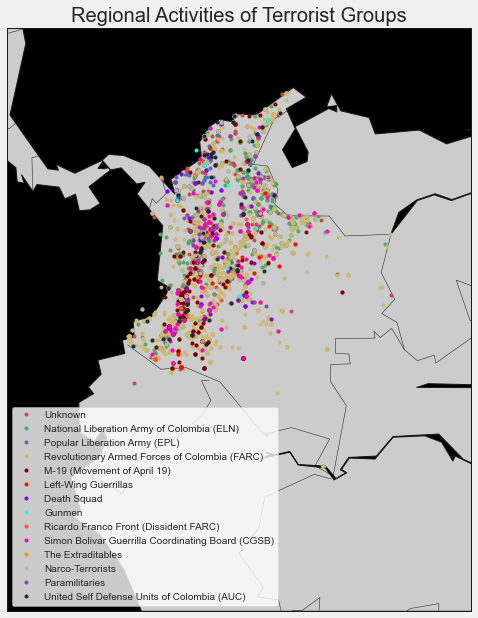

In [28]:
top_groups=df_colombia[df_colombia['group'].isin(df_colombia['group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlon=-84,llcrnrlat=-10,urcrnrlon=-64,urcrnrlat=15, resolution='c', lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='black')
m4.drawmapboundary(fill_color='black')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
Group=list(top_groups['group'].unique())
def group_point(Group,color,label):
    lat_group=list(top_groups[top_groups['group']==Group].latitude)
    long_group=list(top_groups[top_groups['group']==Group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(Group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

* The basemap clearly shows the regions of activity by the groups.
The Unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groups.

### Motive Behind Attacks
* Motive simply means the reason for doing something. Now this reason may be anything, personal grudges, revolt against government, religious sentiments, etc. In this part we will try to analyse what are the main reasons behind the terrorist activities.

* For this we will use NLTK for Natural Language Processing. The reason for using NLP is because if we simply take the count of words and make a wordcloud, many useless words like 'the','and,'is', etc will have the highest count as they are very common in english language. Thus using NLTK, we can filter out these words and find other important words.

In [29]:
kaggle=b'/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYAlgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAK83+Oelf2n8Lr6RV3SWMsd0o+h2sfwV2NekVn67piazoGo6XJjbeW0kBz23KRn9aAPhCinSI8UjRyKVdCVZT1BFNoA9T/AGf9UFj8SltWI239pLCM/wB4YkH/AKAfzr6sr4d8F6t/YfjbRdSLbUgvIzIf9gsA3/jpNfcVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHxZ8TdI/sT4k69ZhdqG6MyAdAsmJAB9A2Pwrk69m/aO0n7N4v03VFXC3toYyfV425/R1rxmgAr7i8Gat/bvgrRtT3Ze4tI2kP8AtgYb/wAeBr4dr6p/Z91b7d8OTZM2X0+7kiA9FbDg/mzflQB6tRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHj/7RWmfavAtnqCrl7K9XcfRHUg/+PBK+YK+6PE3h2y8V+HbzRNQMgt7pQGaMgMpBDAjPcECvnb41fDjT/B1rot7ots8dkyG1uHZtxaUfMrN/tMN3Tj5egoA8gr6f+BXgvX/AArZ395qghjtdThhlhiWTc4I3EEgcDhvX09K+YK+5PB14uoeCtDu1ORLYQsfY7BkfnmgDbooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBskiRRtJI6pGgLMzHAUDqSa8G+JXxM8LeNfDeqeGtMN5Ldxj7RBcmICFzF87YJbd9wPj5a9o8RmxHhnVP7TlMVgbSVbhx1WMqQx+uM18KBipypIOCOPegBK+jvhN8UvDejfDu30/XtWS0uLKV4lRkd2ZCdykBQTj5iPwr5xooA+pdR/aG8HWoItIdSvW7GOEIv5sQf0rkdS/aVvX3DS/DtvF/de6uGkz/wFQv8AOud+Dvw50Hx6uqSatdXiyWTx7Ybd1QMrBuSSCf4T0xXb+NP2fLe7WyPg5rayMastyt7PIRJ0wwOG56gjAHSgDzrUvjn471DcI9SgskbqtrbqP1bcw/Oui+E/xZ8Qv4wtNG1y/l1Cz1CTylabl4pD90g9cE4BB9cj34Tx38PNU+H9xYw6lcW0/wBsjZ0e3LFQVIBHzAeo/OvQvgB4Ee81I+Lr6PFralo7JWH+skxhn+igkfU+1AH0fRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBU1XT4tW0i902fPk3cDwPj+6ylT/OvCPEXwu+Hfw/8ADaTeJNQ1O6vJSfJMB2NMy4JRVAIUHuWPfg9K+gq8E/aU1Ira6Fpf2YbXeS488/7IC7R/31k/hQB8+NjcdoIXPAJyaSiigD1z9njVvsXj+fT2b5L+zdQPV0IYf+Oh6+jdc8TaJ4bgWXWNTtbMMCUWWQBnwOdq9T+FfGXg/X/+EX8X6XrRR3S0nDyKn3mQ8MB7lSam8beLr3xt4muNXuxsVvkggzkQxjoo/mT3JNAHWSyar8b/AIoqi+ZDYDgDqLW2U8n03HP4swHSvqbTNNtNH0y206whENrbRiOKMdgP5n3r5+/Zy8QWFpqWp6HOkUd5eBZYJjw0m0HMefbO4D/er6MoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvOPjXqeh6d4CuV1a0W5ubpXt7H92paOUrneCfugYBOOvAr0euM+J3hXS/FHg27OpiYf2fFJdwvC4VgyoTjkEYPfigD4zooooAK1pvDWrw6Da639ilfTbgMVuY1LIhVipVyPunIzg9iKya0rHxFrWl27W1hq19bW7gh4Yp2WNgeoKg4Oe+RQBQhmlt5o5oJHiljYMjoxVlI6EEdDXt/wAMvjlNYNFo/i6eS4tScRai5LyR57Sd2X/a6j3HTyq88L3cHhLT/EsP76wuZHglYD/UTKx+VvqoDA+5HbnCoA++re4hu7eO4t5UmhkUMkkbBlYHoQR1FS18a+Cfij4i8DnybKZbnTyctZXOSgPcqeqn6ceoNfSHgD4paL4+Vre3SSz1OKPfLaSkHI6Eo38QHHYHnpQB3VFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRR0rzTxV8cPCnhudrW3kk1W7UkMlmQUQ+hc8flmgD0uivlbxD8fvFuqzMNLMGkW2flWJBJIR7sw/kBXH3fxF8Z3rZm8UaqPaO6aMfkpAoA+2aK+LbL4n+OLBgYfE+otj/AJ7y+d/6Hmu/8N/tF6vZqsPiHTotRTPNxARDJj3XG0/htoA+k6K5Xwj8RPDnjWL/AIlV7i5Ay9pOAky/8BzyPcEiuqoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmX47eOdZuPFF34Ujka20u1Ee+NDg3BZA+WI6qN3A6cZPPT6ar5h/aK0v7L45stQVcJe2YDH1dGIP/AI6UoA8eooooAKKKKAPRPDV5qmo/B/xR4f063+0eVdQXsydWWHneyj2aOPPsTXndelfAzVBYfEmCzdsQ6lby2j5AI6bxweOqAfjXF+JPD974W8QXmj6gm2e2cruxgSL/AAuPYjmgDJq9o+sX+gatb6pply1veW7bo5FAOOx4PBBHGDVGigD73sPtP9nW32xla68pfOKjAL4G7A7c5qxXz74L/aD8uPS9J8Q6cCBtgm1NJ8YHQOybfpk7vU47V9AghlDKQQRkEd6AFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsPxT4u0bwdpTX+sXSxJyI4l5klb0Ve5/Qd6o+PPHem+A9DN9efvbmXK2tqpw0zj+SjjJ7fUgV8ieKfFOqeMNcm1XVZt8r8JGv3Ik7Ko7Afr1PNAHT+Ovi54g8Y3MsMU8unaSflWzgkI3r/00YfeJ9Ont3rz6iigAooooAKKKKAHxSyQTJNDI8cqHcroxBU+oI6V7R4A+Pd9phi07xZ5l9Z8Kt6ozNGP9r++Pf73Xr0rxSigD7z0zVLHWtPhv9Nuorq0mGUlibIP+B9jyKuV8W+A/iBq3gPVhcWTmWylYfabN2+SUf+ysOxH6jivrnwv4n03xfoMGr6XKXgk+VlYYaNx1Rh2I/wACODQBs0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV4t+0hpf2jwnpWpquWtLsxH2WReT+aL+de01xnxY0s6v8L9egVcvFb/AGhfUeWQ5/RSPxoA+M6KKKACiiigDR0HVH0TxDp2qR53WdzHPgd9rA4/HFfXnxA8EWHxA8LPCBGL1U82xuscq2MgE/3W6H656gV8ZV9n/CzWP7b+Gmh3RbMkduLeT13RnZz9doP40AfG95Z3Gn3s9ndwtDcwSGOWNxgqwOCDUFezftAeC59O8RDxVbgvZaiVjmwP9VMqgD8GC5+ob2rxmgCW3t5ru5itraF5p5WCRxxqWZ2PAAA6mvs34aafrWlfD/S7LX2Y38UZBRjlo0ydiE9yFwPbp2r4ytrmazuobq2laKeFxJHIpwVYHII/Gvs34c+NIfHHhK31EFVvI/3V5EP4JQOTj0PUfXHY0AdbRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVieKvFeleDtEk1XVpikSnbGijLyvjhVHqcfQd62JZEhieWV1SNFLMzHAUDqSa+Pvir48fxz4paS3ZhpVnmKzQ9x3kI9Wx+QAoAw/GPi3UPGniGfVtQbBY7YYQflhjB4Uf49zk1gUUUAFFFFABRRRQAUUUUAFFFFABXb/DT4hXfgLXhKd8ulXLBby3HcdnX/AGhn8enuOIooA++LO7t9QsoLy0lWa2njWSKRTw6kZBH4VPXiP7PHi5r7R7vwxcvmWx/f22T1iY/Mv4Mc/wDA/avbqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKhu7aO9s57WYZinjaNx6qwwf51NRQB8EXtpJYX9xZzcS28rRP8AVSQf5VXrt/i7pf8AZPxR1yILhJ5hcqfXzFDn/wAeLD8K4igAooooAK+j/wBm7WPO0DWNGdvmtrhbhAf7rrg4+hT/AMer5wr1L4Bax/ZvxJjtGbEeo20kHPTcPnH/AKAR+NAH0t4n8P2vijw3f6LdgeVdRFQ2M7G6qw9wQD+FfEWp6dc6Rql1p17H5dzaytFKvoynB/D3r70r55/aH8GmK6tvFtpH8kuLe92jowHyOfqBtP0X1oA8GrufhX45fwP4tjmmdv7Lu8Q3iDsvZ/qp5+mR3rhqKAPv2ORJY1kjdXjcBlZTkMD0INOrxj4BeOv7W0V/C9/Lm809N1qWPMkHTb9VPH0I9DXs9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHjfx/8Z/2T4fj8NWjst3qa75mU42wA9P8AgRGPoG9a+ZK9Y/aGJPxJiyc40+LH/fT15PQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBu+DvEU/hXxZp2sQyMqwTL5wX+OInDr+Iz+lfcKsGUMpBUjIIPBr4Br7d8BXzaj8P/D905y72EIc56sFAP6g0AdFRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzZ+0jpfkeJ9I1RVwt1aNCxA6tG2f5OPyrxOvqH9ojSxd+ArW/UfPZXikn0RwVP67K+XqACiiigArU8Oaq2heJtM1VSf8ARLqOYgdwrAkfiMisuigD79R1kRXRgysMgjoRVLW9HtPEGiXmk36b7W7iMbjuM9CPcHBHuKwPhhrH9ufDbQ7wtukW2EEh77o/kJP125/GuuoA+GPFPhy88KeI7zRr5f3tu+FfGBInVXHsRzWPX1R8cPAX/CTeHP7asId2qaYhYhRzNB1Zfcj7w/Ed6+V6ANPw/rl54a1+z1iwfbcWsgdQejDup9iMg/Wvtfw5r9l4o8P2es6e+be5j3AHqjdGU+4OQfpXwrXr/wACfHv9ga6fDt/LjTtSkHksx4in6D8G4H1C+9AH1BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzh+0jo5h17R9ZUHZc27WznsGRtw/MP/wCO14fX1r8dLPTbn4Y3k1+SsttLHJaMvXzSduPoQWz+favkqgAooooAKKKKACiiigAooooAKKKKACiiigAr7W+G1rJZfDbw9DKMP9hjcj03DcP0NfHGh2Uep6/pthNIY4rq6ihdwMlQzAE/rX3bFEkEKRRIEjRQqqOgA4AoAfRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHL/ABH0v+2fhzr1kF3O1m8iLjqyfOv6qK+KK+/XRZEZHUMrDBB6EV8Ja7praN4g1HTHzus7qSA577WI/pQBn0UUUAFFFFAH0n+zfrH2jwzq2ju2Ws7lZkB/uyLjA/FCf+BV7ZXyn8AdYOnfEhLJmxHqNtJDgnjco3g/X5SPxr6soAK+TPjP4B/4RDxN9vsYtukaixkiwOIpOrR+w7j2OO1fWdYXjDwvZ+MfDN3o14ABMuYpcZMUg+64+h/MEjvQB8O0oJBBBwR0Iq5q+lXmh6vdaXqERiurWQxyKfUdx6g9Qe4NUqAPrz4QePP+E08KLHdyZ1awCxXWTzIMfLJ+ODn3B9RXodfE/gHxdP4J8W2mrR7mgB8u6iX/AJaRH7w+o4I9wK+0bO7t9QsoLy0lWa2njWSKRTw6kZBH4UAT0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHgX7SmrSLDoWjo2InaS6kX1Iwqfzf86+fa9m/aQnLeNtLt+cJpwf2+aRx/7LXjNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEkE0ltcRzxNtkjcOh9CDkV9W/D74zaV40vE0q6t207VWX92jPujnIGTtOBg8E4Pbua+Tq6DwNfWOmeOtEvtTkaOzt7yOSR1/hwcgn2Bxn2zQB9v0U1HWRFdGDKwyrKcgj1p1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfInxv0r+zPilqLqMR3iR3SDHquG/8eVq+u6+ev2ldLC3Wg6so5dJbZz/ukMv/AKE9AHgtFFFABRRRQBp+HdWfQfEmm6smSbO5jmIH8QVgSPxGR+NfdEM0dxBHPC4eKRQ6MOhBGQa+BK+yvhLq/wDbPww0Sdm3SQw/Zn9QYyUGfwAP40AdrRRRQB4l8fPAP9paaPFmnRf6XZptvVUcyQ9n+q9/9n/dr5tr79kjSWNo5EV43BVlYZDA9QRXyB8WPAL+B/E7C2RjpN6TLaOf4P70ZPqufyI96AOBr6E/Z78bvNHN4QvpMmJWnsWY87erx/hncP8AgXpXz3V3SNVu9D1i01Sxk8u6tZVljb3HY+oPQj0NAH3lRWR4Z8QWninw5ZazZH9zdRhipPKN0ZT7g5H4Vr0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzH+0Xpl3F42s9SaF/sc9kkSTY+XerPlc+uCD+NeOV9WftAFP8AhWLbpChN7DtAXO8/Nx7cZOfbHevlOgAooooAKKKKACiiigAooooAKKKKACiiigAooqW1tp727htbaJpZ5nEccajlmJwAPxoA+ufgnqM2o/CvSjO5d7cyW4Y/3Vc7R+C4H4V6DWP4V0KLwz4W03RoQuLSBUcqOGfqzfixJ/GtigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvKv2gtNN78NTdAc2N5FMT7NmP+bivVawvGejHxB4M1jSkXdLc2rrEP+mmMp/48BQB8O0VMlpcyTPClvK0sYYuioSyhfvZHbGDn0xUNABRRRQBteGfCmseMNTfT9EtRcXCRGZwZFQKgIBOWI7sPzr6s+E3hHUvBfgoabqssbXUlw85SNtyxBgoC57/dz+NfK3g7xJceE/FVhrFu7gQSjzkU48yIn51Prkfrg9q+3oJ4rq3iuIHEkMqB0cdGUjIP5UASUUUUAFc7438I2fjXwxc6Rd4R2G+3mxkxSj7rfTsR3BNdFRQB8Garpl3ouq3WmX8RiuraQxyoexH8x3B7iqdfSXx6+H/9p6f/AMJZpsObu0Tbeoo5kiHR/qvf/Z/3a+baAPXfgT47bQfEQ8PXsuNO1OQCIseIp+in6Nwv12+9fUVfAKsyOroxVlOQQcEGvsv4XeL/APhMvA9nezSq1/CPIvAOvmL/ABH/AHhhvxPpQB2dFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHif7Rmvx23h7T9B+z75LyU3HmnpGI+OPc7vyB9a+bK+of2hPDj6p4Lt9Xgj3TaXNufHURPgN+TBPwzXy9QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVueD9bi8OeMNK1ieEzQ2lwskiDqV6HHuAcj3FYdFAH31a3MN7aQ3VtIJIJ0WSN16MpGQR9QalryH4AeLP7Y8JS6FcSZutKYCPPVoWyV/I5H02169QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBz3iPTbe28M+IbrT7S3t7+ewnzPFCod22NgkgZbn1r4hr75u4UuLKeCUgRyRsjE9ACMGvjDxPpHhjQ7OOy07WZdY1cOPPuIFCWkY5yqkjMhzj5gQOPyAOVooooA9A+HPhfwlrFvf6h4w1xdOtYGWO3iW4RJJmwSx2kFiANvQcluvGK9a/wCF4+B/C+k2mk6NHqWpQ2kSwxME2jaowMs5B/8AHa+ZaKAPoi9/aVsltl+weHLh5yORPcKqqfwBJ/SovB37Qd1qXiaGx8RWNjbWNy4jjntwymFicAvuYgr2J4x1r58p7RSJGkjIwR87GI4bHXFAH35RXJ/DXXz4l+Huj6hI5efyBDOWOSZE+Rifc4z+NdZQA10SSNo5FVkYEMrDIIPY18h/FrwA/gjxMz2kTf2PekyWrdRGf4oyfbt7Ed819fVgeMvCll4z8M3Wj3oC+YN0MuMmKQfdYf19QSKAPh+vQ/g945/4Q3xesd3Jt0rUNsFzk8RnPySfgSc+xNcXrWj3ugaxdaVqMJiu7aQpIvb2I9QRgg+hqhQB9/8AWivLfgf44bxR4VOl3sm7UtLCxlieZYv4G+oxtP0B716lQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBwfxl1M6Z8LNZZcb7hEtlz/ALbAN/47ur48r66+OFo938KtTMcZdoXilOOwDjJ/ImvkWgAooooAKKKKACiiigAooooAKKKKACiiigAooooA9Q+AU5i+KEEe8qJrWZMD+Ljdg/ln8K+r6+NvhNrdroHxL0i8vMiB3a3Zh/AZFKAn2BIz7V9k0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRSMyqMswGTgZPc0tABRRRQAUUUUAFFFcR8S/H8Xgfw1Jd2ptbjUnkWKG3kk6E5yzKDnAAP44oA7eivi+T4o+NX1w6uPEF2t10CqR5QHp5ZGzH1FU9X8e+LNd3DUfEF/KjdY1lMcZ/wCALhf0oA+jfjX4sstL8Aajp1vqEH9pXhW3ECSgyBScuSoOQNoI/Gvk+iigAooooAKKKKAOq+HvhODxr4vt9Fub5rOOVHfeqBmbaMlRk9cZ59ulenfHLwTp/hzwX4bOkwGO2sZpLVieWfzBv3Me5yjf99fSvKvAWrDQ/Huh6izbY4rtBI3ojHa//jrGvqP4waT/AGv8LtajVcyW8YukPp5ZDN/46GoA89/Zt13dbazoEjcoy3kI9j8j/wAk/Ove6+OPhFrv9gfEvSZnfbDcyfZJfQiT5Rn2DbT+FfY9ABRRRQB5X8ZfhqPF2k/2vpcI/tqyT7qj/j5iHJT/AHh1X8R3GPlUgqxVgQQcEHtX39Xzp8dPhp9imk8XaPB/o8rZ1CFB/q3P/LUexPX357nAB5d4G8WXHgvxZZ6xDuaJG2XEQP8ArYj95fr3HuBX2pZXtvqVhb31pKsttcRrLFIvRlIyD+VfBFfRH7Pfjfz7abwhfS/vIQZrEseqdXT8D8w9i3pQB7vRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFTU7WzvtKu7XUFRrKaFknDnA2EfNk9uO9fCV4lvHfXCWkrS2yysIpGGC6Z4JHYkYr6V+O3j9NF0R/C9i+dQ1CL9+yn/Uwk8j6tgjHpn1FfMdABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAoJVgykgg5BHavu/Q706l4f02/Ygm5tYpiR/tID/AFr4Pr7N+FF4b74W+H5mOStt5Oc5+4xT/wBloA7KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5A+L3inUtc8d6rYz30smn2N00MFvnCIV+UnA6nIPJ5rg4p5oM+VK8e7rsYjNdT8T4o4fid4iWNQqm9diB6nkn8SSa5KgDRi8Qa1blTDq9/HtGF2XLjA/A1ow+PvGFuMR+KNYAAwA17IwA9gTxXO0UAdbH8UPHEa7V8T6gR/tSbj+ZpknxL8bSNubxPqYP8AszlR+QrlaKANe98V+ItSBF9r2p3Kn+Ga7kYfkT71kUUUAFFFFABRRRQAUUUUAFFFFAB0r7g0C7i8V+A7C4nO9NR09RNz3ZMOPzyK+H6+rPgDq39ofDZLRmy+n3MkGD12nDj/ANDI/CgD5durefS9UmtnJS4tZmjJHBDK2P5ivt7wtrSeIvCul6uuP9LtkkYDs+PmH4NkfhXyl8YtJ/sj4o6wiriO5dbpD6+YAzf+Pbq9i/Z2137d4MvNHdsyadc5QekcnzD/AMeD/nQB7FRRRQAVFcW8N1bS29xGssMqFJEcZDKRggj0qWigD4++Knw8m8CeIM26s+j3hL2kp52esbH1Hb1GD6447SNVu9D1e11Swl8u6tZBJG3uOx9QehHoa+2fFPhqw8XeHrrR9RTMUy/K4HzROPuuvuD/AFHQ18Y+KPDd/wCE/EF1o+opiaFvlcD5ZEP3XX2I/wAKAPszwn4ltPF3hmz1qz4S4T5485MbjhlP0P58HvW3Xyv8DfHf/CN+Jf7Fvptul6m4UFjxFP0VvYH7p/4D6V9UUAFFFFABRRRQAUUUUAFFFFABWT4m1628MeG7/WrvmK0iL7c4Lt0VR7kkD8a1q8/+M2gaj4i+HV1b6YjS3EEqXJhT70qrnKgdzznHfHrigD5P1vWL3xBrV3quoSmW6upC7t2HoB6ADAA9BVCjpRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfZnwmsjYfCzw/CRjdbGb/v4zP/AOzV8faZp8+rarZ6dbDM93MkEYP95iAP5191abYRaXpVnp0H+ptYEgj/AN1VCj9BQBaooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+MPip/yVDxD/ANfZ/kK4+uw+Kf8AyVDxD/19n+Qrj6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr3L9mzVvK1rWtHZuJ7dLlAfVG2n/wBDH5V4bXc/CDVv7I+KOiyM2I7iU2rj18wFVH/fRWgDu/2k9J8vVtE1hV/10D2zn02NuX897flXN/AXXf7J+I0dlI+2HU4Xtzk8bx86n6/KR/wKvX/j7pP9o/DOW6Vcvp9zHcZ74JKH/wBDB/CvlvS9Qm0jV7PUrf8A11pOk8f1VgR/KgD70oqvYXkOo6fbX1u26C5iWaM+qsAR+hqxQAUUUUAFcD8VPh3D470DNuqx6zaKWtJTxv8AWNj6Hsex59c99RQB8DXNtcWN3La3MTw3ELlJI3GGRgcEEetfWnwe8df8Jl4TWG7l3atp4WG5yeZF/hk/EDB9wfWsL4zfCv8A4SO2k8RaHB/xN4V/fwIObpB3A/vgfmOOoFeEeA/F1z4I8W2urRhmhU+XdQj/AJaRH7w+o6j3AoA+2aKr2V7balYwXtnMs1tcRiSKRTwykZBqxQAUUUUAFFFFABRRRQAUUUUAfGfxV0GTw/8AEjWLdo9sNxMbuA4wCkh3cewJZf8AgNcZX1z8XPh0vjjQftFkgGtWKlrY5x5q9TGfr29D7E18kzQy288kE0bRyxsUdHGCrA4II7EUAMooooAKKKKACiiigAooooAKKKKACiiigAooooA9N+A+jRat8TIZpvu6fbPdqP7zAqg/Ivn8K+sq+aP2bpAPGOrR5X5rDOO/Ei/419L0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHxJ8QYpIviN4kWVSGOp3DAH+6ZGI/Qiubr0H4y6HqOl/EbU7u8tmjtr+Uy20v8Mi4GcH1HcV59QAUUUUAFFFFABRRTkR5HCIrMzHAVRkmgBtFKysjsjqVZTggjBBqexsLzU7yOzsLWa6uZDhIYULu3GeAOelAFeirF5Y3en3Bt721ntp16xzxlGH4Hmq9ABRRRQAUUUUAFT2d1LY3tvdwnEsEiyofRlOR/KoKKAPuDWraLxb4DvYIRuTU9PYw/V0yh/Mg18QEEEgjBHUGvsL4Oat/a/wALtHZmzJbI1q4z02MQo/752/nXzB8QNJ/sP4ga7p4Xakd27xr6I53r/wCOsKAPpD4F69/bPw2trZ2zPpsrWr+u37yH6bWA/wCA16XXzN+zpr32LxbfaLI5EeoW++MZ/wCWkfP/AKCW/KvpmgAooooAKKKKACvC/jB8H/t4n8S+Grf/AEvl7yyjH+u9XQf3vUd+o56+6UUAfNnwQ+Jg0e5TwprMuLCd/wDQ5nPEEhP3D/ssenofrx9J14h8XPg4mqJceIvDNvt1DJkurNBxP6sg7P3I/i+vW58FfiaddtV8M61NjVrZMW8sh5uI1HQ56uoH4jnsaAPY6KKKACiiigAooooAKKKKACvj/wCNVmLP4sa0Fi8uOYxTL/tbol3H/vrdX2BXzn+0npKRaxomrpHhriGS3kYd9hBXPv8AOfy9qAPDKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOq+HHiJvC/j3SdSL7YPOENxzx5T/K2fpnP1Ar7Vr4Ar3P4T/Gh7FodA8VXLSWrEJbX8jZMPosh7r6N278dAD6MopAQyhlIIIyCO9LQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBVvdOsdSiWK/sre6jU7lSeJXAPrgisubwR4TnJMvhjRnJGMtYRZx9dtb1FAHIT/C7wNcff8M2AyMfu0Kf+gkVTk+DXw/lUBvDsYwc/LcTL/J67uigDzl/gZ4AZyw0iZAf4VvJcD82qeD4KfD6DB/sASMB1kupmz+G/H6V39FAHLWvw28FWf8AqvC+ln/rrbrJ/wChZres9M0/Txiysba2HpDCqfyFW6KAPmz9oTwfFpusW3ia1CJFqB8meNUx+9AJ3Z/2h+qk967n4HeCtF03wvZ+J4C1zqN/EQ0smMQgMVZEHbleT1OO3StX436T/anwu1B1XdJZPHdJ/wABO1v/AB1mrwW18e6ppnwjh0HTruS2kOoyiWSJ9riEorBQRyAWL5+n1oA+hPil4PHjrwhPY2P2d9UtZFlty7DKnOGXPbIz7ZA9K+PCCrFWBBBwQe1XtK1rU9D1Bb/S76e0ulP+sicgn2PqPY8VVurh7u7muZdvmTSNI+0YGScnA7UARUUUUAFFFFABRRRQB6d8N/i6/wAP9Du9NbSDqCTXPnp/pPlBMqA38LZ+6v61i/E7xRpnjLxPDrmmwywNPaItzDKOUlUsvUcEbQmD/KuLooA2PCmtt4c8WaXrCk4tLlJHA6lM4YfipI/GvuVHWSNZEYMjAFWB4IPevgKvrn4Ia+dc+GlnHI5afTnazck84XBT8NjKPwoA9GooooAKKKKACiivAPjxqXjTRvEFhf2V7dWmiogWCS0lZR53VvMx39AcjA4/ioA9/rxz4ofCaW/vG8V+Es22twt50kEXy+ewOd6HtJ/6F9etv4V/GC38WpFo2tMlvrirhH6JdYHUej+q/iPQesUAef8Aww+IsfjTTHs78C31+yG27t2G0tjgyAdueo7H8K7qG7triWaKC4hlkgbZMiOGMbYzhgOhx614n8bZtB8M6nY63ptxPp/jEnzIZLRRiRM4JmB4I6gHnPQgjpm/CjxfB4R0q91LxRZasn9tXH2k6v5Blt3AyOSuSDuLk8d/agD6EorloPiT4KuYfNTxRpQUDOJLlUP5Ng1Wn+K/gS3OH8S2Z5x+73P/AOgg0AdlRXnk3xw+H8RAXWnl9dlnNx+aiqcvx98Cx7ttxfSY6bLU/N9M4/WgD0+ivIpP2i/ByPhbHWpB/eWCPH6yCuX8SftHzSK0PhrSPKyOLm/ILD6RqcA/Vj9KAPedT1Sw0awkvtSvIbS1j+9LM4VR7fX2r5t+M3xP0TxpZWmk6NBNKlrcGZryRdgb5Su1V64Oc5IHQcV5t4g8U634pvPtWtajNdyDOwOcKn+6o4X8BWPQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHrvww+NFz4WSLR9fMt3o4+WKUfNLbDsB/eT26jt6V9L6ZqljrOnw3+m3UV1azLuSWNsg/4H2PIr4Lq3Y6nqGmS+bYX1zaSf37eZoz+YNAH3pRXx1YfGLx7p6qkfiCWVB2uIo5SfxZSf1robX9ojxjAR51tpVwvffA6n/x1x/KgD6korwTSv2lYSQuseHpEGeZLOcN/wCOsB/6FXdaP8avA2sSLH/axspW6LexmMfi3Kj8TQB6DRUcFxDdQJPbzRzQuMrJGwZWHsR1qSgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorB8YeLdO8FeHptY1IsyKwjiiT70shzhR+ROfQGgDQ1nTk1jQ7/AEyTGy7tpIGz2DKV/rXwwW+zwXVlOjLL5inHoy7gQf8Avo/lXq91+0Z4qku52tdP0uG3YERRvG7snod24ZI+mPavI7m4mvLqa6uH3zTO0kjEY3MTkn86AIqKKKACiiigAooooAKKKKACnyRmMgMVOVDDawbgjPbv7dqZRQAV7T+zr4iktfFF5oE0zfZ72AywxluBKnJwOxK7s/7orxat7wTqc2j+ONEv4PvxXkYI/vKx2sPxBI/GgD7hooooAKKKKACqmp6ZZa1ptxp2o2yXFpcJskiccEf0PcEcg1booA+TfiV8K9R8BX39q6W80+jGQNFcKf3lq2flDke+MN/I9eu8E/tBmC2tdO8U2skzhhGdRiIzt6bnXuR3I6+mevv13aW99aTWl1Ck1vMhjkjcZDKRgg18nfFb4YRfD+ezns9QNzY3hZUSbAlRlwTnHBHPUf8A6wDQ8Y6xoHjHxB4numSTUNVnuoNP0GKCQ4IXcrPxwVJIIz1JGOM4+jPCGg/8Iz4R0vRi4drSBUdh0Z+rEe24mvmj4D/2Y3xOtUvoWkuGglNkeqrKFySR/uB8e/6e9eN/ip4d8EK0FxN9s1LHy2VuwLD/AHz0QfXn0BoA3tR8IeG9WB+36Dptwx/iktkLf99YyK8n8b+EPg1ofmLfzNY3fe30+5aSXP8AuHcF/EAV5l4r+Mfi3xQ0kQvTpti3AtrIlMj/AGn+83vzj2rgCSSSTknqTQBq69/wj/23b4eGpG1Gfm1Bk3n8EGB+dZNFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB0Phbxtr/AIOvBcaPfvGhOZLd/mik/wB5en4jB9DX1H8Ofidpnj6zaNVFpq0K5ntGbOR/fQ91/Ud+xPx3V3SNWvdC1a21PTp2hu7Zw8bj19D6g9CO4NAH3lRXOeBvF1r428K2usW4CSN+7uIQc+VKPvL9OhHsRXR0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA13SONpJGVUUEszHAAHc187fGrx14e8X6EunaLe/aJtOu1lkfG1JFIZDsJ5bBK5wOhyMgGuy/aB1y50vwFFY2zMn9o3IhlYf88wCxXPuQv4Zr5ZoAKKKKACiiigAooooAKKKKACiiigAooqSLzWfy4d5aT5NqZy2T0wOvOOKALGm6VqGs3q2emWVxeXLDIigjLtjucDt717P8Lvgzr1n4qsda8SWcdrZ2h86OB5FZ3kH3Mhc4APzcnsOK6D4K/C3UfDl1/wAJLre62upITHBZfxIrYy0noePu9u/PA9soAKKKKACiiigArk/FXxI8L+Dv3eqaipuu1pAPMl/FR93/AIFiuN+PXjW68PaBaaPpl4be91BiZWjbDrCOuCOV3E4z6Bq+XySzFmJJJySe9AH0n4t/aE0m20mNfC8T3d/Omd9xGUS2/wB4fxN7Dj37V4BfalrHi3XUlv7ua+1C6kWJGkbuTgKB0Ayeg4rKq9aTJYpLMyE3RUCAMvCZ/wCWn1x09znjAyAdn4ivdF8BeIryx8Gy3Mt9Cht5dVmmVvLYjEghUKNp6qWJY9cY6ngJJHlkaSR2eRyWZmOSSepJpvWigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA9Z+Ani46H4xOi3EmLLVgEXJ4WcZ2H8eV9yV9K+pq+A4pZIJo5oXZJY2DI6nBUjkEV9r+AvE48X+C9O1g4E8sey4UdpV+VvoCRkexFAHS0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc3478Vx+C/CF5rTRCaSLakMROA8jHAB9h1PsDXSV4b+0lrCx6Lo+ipKPMmna5kQHnai7VJ9iXP5e1AHCa/8UJviH4QvNH1+2tLe/t3F5YzwBlRiud0bAk4JQtg55IA6nNeW0UUAFFFFABRRRQAUUUUAFFFFABRRRQAV3Hwj1lNG+JWkGS2gnS6nW1zJGGaMudqsh/hIJHPpkd6xvBvhS68aeJINFtLmC3llVn8yYnACjJxgcnHavozwd8CtA8Maja6nd3VxqV/bOskRcCOJHHIYKOcg8jJNAHqlFFFABRRRQAUUV5j8R/jFpfg6OXT9MaO/1vGPLBzHbn1kI7/7I59cdwDxT45fbf8Ahamo/bDlPLi+zegi2Dp/wLd+Oa4zQfD+qeJtVj03SLOS6un52r0Ud2Y9FHuatQw6/wCP/Fm1TLqGrX8mWdv5nsqgfgAK+uPAfgTTPAmiLZ2aK93IoN3dEfNM4H6KOcDt9STQB5lp/wAK/Dfw18NXHifxc8Wq3ltHuS2I/ceZ/CgU/fJPGTx3xxmvAdR1C41XUrnULt99xcSNJIQMDJPYdh6DtXpvxz8cnxF4n/sSzlzpuluUbB4kn6M30H3R/wAC9a8ooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr6K/Zt1oSaTrOhu3zQzLdRg9w42tj6FF/76r51r0b4H62NH+J1jG77Yb9HtHJ9WGV/8fVR+NAH1zRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV82ftI2k0fijR7zykEEtmYxIEAZnVySC3fAZcDtk+tfSdfN37Q/ix7zWoPCyW6LDY7bmSY/eZ2U4A9FCt+J+lAHiNFFFABRRRQAUUUUAFFFFABRXWeHvhz4k8V6Qmo6HZi7jN1JbSKJFTyiqo2SWIGCJOMf3TXYTfAHXdP8M6hq+pajaRy2ltJcLawAyM+1SdpbgA8ds0AeR0UUUAer/s+adbXvxHa5mdhLY2ck0KhsbmOIzkY5G1z+OK+qK+Wf2fNMnuviC99FcRxx2Vs5ljOd0iuNox2wDgnPt+H1NQAUVUl1XToJzBNf2scwIBjeZQ3PsTWf4p8SW3hjwpf69LiWK2i3IqtxIxIVVz7sQM+9AEuveJdF8MWYu9a1KCyiP3fMb5n/wB1Ry34A15lqv7Rnhm1LJpunahfMOjMFhQ/iSW/8dr538Q+IdT8UaxNqmrXLT3Mp7/dReyqOyj0rLoA9I8WfGzxX4mWS3t510qxcYMNoSHYf7Un3j+GAfSuP8NeGNV8XazHpmk25mnfl2PCxrnlmPYDP+HNbPgP4ca148vwton2fT0bE99IvyJ7D+83sPxI619X+EvB+keC9HXTtJg2qfmlmfmSZvVj/ToO1AGX8Pfh1pngHSzHBi41GdR9pvGXl/8AZX0UHt+dM+KfjFfBngm6uopNuoXINvZgdQ7Dlv8AgIyfqAO9dtXyR8avGH/CU+OJba3k3afpmbaHB4Z8/vH/ABIx9FFAHnBJZizEkk5JPekoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqezu5rC+t7y3fZPbyLLGw/hZTkH8xUFFAH3doOrw6/4f0/Vrf/AFV5AkwGc7cjJH1ByPwrRryD9nnXxqPgm40eR8zaZOdo/wCmUmWH/j2/9K9foAKKKKACiiigAooooAKKKKACiiigAooooAK+b/2jtANvr2ma/Gp8u7hNvKR0Docg/irf+O19IVx3xQ8Lnxb4B1CwiTddxL9ptQOvmJkgD3I3L/wKgD4xoo6UUAFFFFABRRRQAUUUUAfR3wj8XeG/BfwwtX1vVI7Rry7nkRfLdydu1Twqk9h+dbd/8fPAgV4P+JheRONjeXa4Ug8H7xU9681u/DVrrP7Oel6rp4Ml3pFzM9xxyFd8OPwHlt9Aa8goAv61Jpkus3b6NBPBppkP2eOdt0gTtuPqev41QoooA1NB8R6v4YvnvdFvpLO4eMxM6AHKkgkcgjqB+VbEPxN8bwKVTxPqRBOTvmLn82z+VcnRQB1Xh7w/L4yXxLf3WoSC6sNPl1JpJPnMzKQWDE85Izz61n6bo9/f+Gtb1GC6CWemCF7iEuw8zzHCLgdDg+tbvw8neKw8aIqbw3h6fIH/AF0iGfwDE0zwnK0PgTx0V5zZ2ykH3uUH9aAOLr1f4W/B658XGPWNZEltogOUUcSXWOy+i+rfgPUZPwe8H2HjHxoLfU5ENpaRG4e3LYafBAC/TnJ9uO9fXcUUcMSRRIscaKFREGAoHQAdhQBDYafaaXYw2VhbRW1rCu2OKJdqqPpVmiigDj/if4mbwp4A1LUIn2XTp9ntjnnzH4BHuBlv+A18Yda94/aR17zL7SPD8b/LEjXcyj+83yp+IAf/AL6rwegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA9K+BviI6H8Rra2kfbbamhtHz03HlD9dwA/4Ea+ta+Bba5ms7qG6t3Mc0LrJG69VYHIP5190eHtXj1/w7p2rRbdl5bpNhT90kZI/A5H4UAaVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyF8ZfCX/CLePLl4ItlhqObq3x0BJ+dfwbPHYEV57X2T8T/AieO/CrWsWxNStiZbORuBu7oT6MOPqAe1fIOo6Xf6ReSWmo2c1rcRsVaOZCpyP50AVKKKKACiiigAooooA+pPgPp6XHwnuLe8h3W15dTqVbpIhVUP4cEV8++OPC0/g3xbfaNLuaOJ90Eh/wCWkR5Vvrjg+4NfVnwre1f4X+HzaFDGLUK23++Cd/47t1XfE/gPw14xeGTXNNW5lgUrHKsjRuAe2VIyPY0AfElFexfGT4WaV4NsLTWdEkaK0lmFvJbSuXIchmDKTzjCnIPoK8doAKvWOjanqc0MVhp91cyTsViWGFm3kDJAwOcDk+lUa+kf2cNTW58N6rpb4Z7K7WePPVRIuOPxQ/nQB5J4FurTRn8XwaxKLOWXQbu0jimBVmnJTamOucqeDTPCd3aW3gXxus8yrcTWltHDEWAL5nXJA744NfTnin4YeFPF8zXOpadsvWGDdW7mOQ/XHDfiDXCXX7N3h9oZvses6mkpU+V53lsobHG7CjIz6YoA8A8N6/eeF/ENnrNg2J7aQNtzgOvRlPsRkfjX23omsWmv6JZ6tYvvtruISIT1GeoPuDkH3FfDusaRfaDq9zpepQNBd2z7JEP6EeoIwQe4Ne2/s9eNhHLP4QvZMLIWnsSx/i6un4j5h9G9aAPoSiisjxVq39heE9W1TdhrW0klT/eCnaPzxQB8h/EzWz4g+Iut3wbdGLgwRc8bI/kBH125/GuTpSSSSTknqTSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX09+zx4g/tDwZdaNI+ZdMnyg/6ZSZYf8Ajwf9K+Ya9J+B3iD+xPiRa28j7bfUka0fPTceU/HcAP8AgRoA+tqKKKACiiigAooooAKKKKACiiigAooooAKKKKACsDxj4UsPGPhu60u9hRmdCbeVhzDJj5WB7c9fUcVv0UAfAt1bTWd3Na3EbRzwyNHIjDlWBwQfxFRV9MfFf4NHxHcXHiHw+VTU2XdPaHAW4I7qez49eD7d/nPUtK1DRr1rPU7K4s7lRkxTxlGx2OD296AKdFFFABRRRQB7H8AvGr6R4jbw3dzYsdROYAx4jnA4x/vAY+oWvpyvgSCeW1uIriCRo5onDo6nBVgcgj3zX2x4F8VweM/CNlrEW1ZXXZcRqf8AVyr95f6j2IoA80/aThuG8NaJMpP2ZLx0cf7ZTK/or183V9gfGjSv7V+FurbVzJahLpOOmxhuP/fJavj+gAr1r9nrVfsXxBlsGbCX9o6KPV0w4/8AHQ9eS1reGNem8L+JtP1u3jEklpKH8snAcdCue2QSKAPumiszw5q66/4a03V1jEf222jnMYOdhZQSue+DkfhWnQBwvxG+GWmePbDedtrq8KYt7wDt/ccd1/Udu4PyxqWla94C8Txx3cUllqNnKssMg5ViDkOp6MOP6GvuGue8X+DdH8a6Q2n6rBuIyYZ04khb1U/06HvQAzwL4utfGvhW11eDasrDy7mEH/VSj7y/TuPYiuQ+PutR6d8OJLDzMTalOkSqDyVUh2P0+UA/7w9a8ytk8VfAXxU0s8DX2h3R2O6EiKdex/2JBzwffqOa5r4q+OV8c+LPtVoZBpltEIrVJBg88sxHqT+gFAHC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABU1rczWV3DdW7lJoJFkjYdVZTkH8xUNFAH3doGrw6/4e0/VoMeXeW6TAA52kjJH4HI/CtGvHP2ePEf9oeEbrQ5XzNpk26Mf9MpMkfkwf8AMV7HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeIftG+HY7jQtO8RRhRPay/ZZeOWjfJH5MD/32a9vryr9oOMv8M9wIxHfRMc/Rh/WgD5VooooAKKKKACvWvgJ4vOieMDolzLtsdV+RQx4WcfcP/AuV9yV9K8lp8UskE0c0LsksbBkdTgqRyCKAPr34y6zqWh/Di9n063hmWdha3RlXISGQMpYDPXJUc/3q+P6+l/DfjuD4qfDrWfDuomKLxB9ikAjXgT4XKyKPXcBkfj0PHzRQAUUUUAfWXwH1b+0vhjbW5bMlhcSWzZ64zvH6OB+Fem188/s16rtvtc0dm/1kUd1GvptJVj/AOPJX0NQAUUUUAcX8WNVtdJ+GmtS3UUc3nQ/Z4o5FBBkf5VOD3XO7/gNfGle9/tJa6WudG8Pxv8AKiteTL7nKJ+gf868EoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA7v4Q+Jv8AhGPiJp8sr7bS8P2O4ycAK5GCfowU/QGvsSvgDpX2l8NfE/8AwlvgTTtSdw10qeRdc5PmpwSfrw3/AAKgDraKKKACiiigAooooAKKKKACiiigAooooAKKKKACuH+L+nNqfws12JFy8UK3A9hG6uf/AB0Gu4qG7tYb6zntLhN8M8bRSL6qwwR+RoA+BqK0vEGjXHh7xDf6Rc/620maIn+8AeG+hGD+NZtABRRRQAUUUUAanhzXbrwz4isdZsz++tJQ4XOA46Mp9iMj8ab4gjto/EF/9jObR5mktz/0yY7kz6HaRkVm0pYscsSTgDn2oASiiigDv/gxq39lfFLSSzYjui9q/vvU7R/30Fr7Ar4K02+k0zVbPUIf9bazpMn1VgR/KvvC2uI7u1huYW3RTIsiH1BGRQBLRRXn/wATviZZeBNLMEJSfWrhD9nt858sdPMf0Udh3P4kAHzt8W9Y/tr4na1MrZjgm+yx+gEY2nH/AAIMfxriadJI8sryyMWd2LMx6knqabQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7X+zr4m+x+Ib7w7PJiK/j86AE9JUHIH1XJ/4AK8UrQ0LV7jQNesdWtTia0nWVRn72DyD7EZB+tAH3fRVbTr+DVNMtdQtW3291Cs0beqsAR+hqzQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfLH7Qml/YviKl6qYW/s45C2OrrlD+ir+deT19FftLWhbSvD94EGI55oi3puVSB/wCOGvnWgAooooAKKKKACiiigAooooAK+l/BXxq8KaX8P9LttWvpl1KztxA9ulu7MwT5VIbG3lQOpr5oooA981n9pN2WaLRNA2ZUiO4u58kHsSijHHpurwzUNQu9Vv57+/uJLi6ncvLLIcliarUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9Rfs++Jf7V8Fy6NM+bjSpdq5PJifLL+R3D6AV67XyF8F/EZ8PfEexWR9ttqH+hy88ZYjYf8AvsLz6E19e0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHC/GDQP+Eg+GmqRKhae0UXkOBk5j5P5pvH418dV9/MqujI6hlYYIIyCK+FfEul/2J4o1XSx920u5YVOc5VWIB/LFAGXRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAOR2jkWRGKupBVgeQR3r7h8Ha8nifwfpesqRuuYAZAOgkHDj8GBr4cr6K/Zw8R+dpuqeHJny9u4u4AT/AANhXA9gwU/8DoA91ooooAKKKKACiiigAooooAKKKKACiiigAooooAK+JPiFFLD8RvEizAhjqVwwz/dLkr+hFfbdfNH7RHho2Pie08QQp+51GLypSB0lQY5+q7f++TQB4vRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFdl8K9f/AOEd+I+kXbvsgml+zTE9Nkny5PsCQfwrjaUEqwZSQQcgjtQB9/UVh+DdbHiPwbpGr7svc2yNJ/10Aw4/76BrcoAKKKKACiiigAooooAKKKKACiiigAooooAK5T4jeFR4x8EX+lqoN0F861J7Sryv0zyv0Y11dFAHwE6NG7I6lWU4ZWGCD6U2vUPjj4OPhzxm2p20W3T9VJmXA4SX/lov4k7v+Be1eX0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9N/s6a19s8G32ku2ZNPutyj0jkGR/48r/AJ17JXyx+z7rP9n/ABCfT3fEeo2zxgHu6fOv6Bh+NfU9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzHj3wdbeOPCtxpEzCObPm20xH+qlGcH6ckH2Jr431rRdQ8PatcaZqds8F1AxVlYdfcHuD2I61931yHj34eaT490vybtfIvolP2a8RRvjPof7y56j8sHmgD4vorU8ReH9Q8L65c6RqcXl3MDYOOVcdmU9wRWXQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAa/hXVjoXizSdUBwLW7jkb3UMNw/EZFfdFfAFfc3hK/OqeDtFvyctcWMMjf7xQZ/XNAGzRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAjMFUsxAUDJJPArxbxX+0NpWnST2nh6xfULiNyn2mY7YDjuuDuYf8AfP1rpfjdqmoaZ8NrpNOilaS9mS1keJSTHGwJY8dAdu3/AIFXg5uNc1LwNa+GNC8EXcKlg95ew2zyy3bdeWCDaucHHPReeOQDB8ZeNtW8c6lFfastqskKGOMW8OwBc5xnkn8Sep9a5uvRdK+B/jrVFV302Kxjbo15Oqn8VGWH4ijxj8GvEXg3QV1a5mtbyBW23H2Tc3k56McgfLnjPbj1oA86ooooAKKKKACiiigAooooAKKKKACiiigAorrE8BahH8Prnxhet9mtBIkdpEy/NcFmwW9lAzg98VydABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX2H8Gbv7Z8J9EYn5o1kiPttkYD9MV8eV9Lfs5a3Fc+FtR0VnH2i0ufOVc9Y3A/kyt+YoA9pooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACo54Irm3kgniSWGRSjxuuVZTwQQeoqSigD5S+K/wouPBt2+q6UjzaFM/1a1Y/wt/s+jfgecE+W199zQxXMEkE8SSwyKUeN1DKynggg9RXz58RvgNLC82q+D0MkRy0mmk/Mvr5RPUf7J59M8CgDweinyRyQytFKjRyISrIwwVI6gimUAFFFFABRRRQAUUU+GGW4mSGCN5ZZGCoiKWZiegAHU0AMr1z4RfCaTxTcpreuQPHosRzFGw2m7b0/wBwdz36Dvje+HHwHlleHVvGEflxjDxabn5m9PNPYf7I59cdK+gooo4YkiiRY40UKiIMBQOgA7CgDxD9o6/js/DOhaJAFjSW4aURoMBVjTaBgdB+84Ht7V85V6z+0Lqv234hx2CtlbC0RGX0d8uf/HWSvJqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuy+F3iweDvHdlfzPtspv9Gu+eBG2PmP+6QrfhXG0UAffwIIBByD0IoriPhDrh174Z6TNJJvntkNrL65jOBn3K7T+NFAHcUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB578QvhNo/jiN7uPbYawF+W7ReJPQSD+Ie/Ue/Svl3xP4T1nwhqjWGs2jQycmOQcxyr/eRu4/UdwK+5Kzta0LS/EWnPp+r2UV3av1SQdD6g9VPuOaAPhGivWfHXwN13Q7+Sfw9by6ppbklFjwZov9ll6t9R+IFeb3+gazpYzqOkX9mB3uLZ4/8A0ICgDOoortPAnwz1zxzeIbeFrbTA376+lXCAdwv99vYfiRQBm+D/AAXrHjbVxYaVBlVwZ7h+I4VPdj/IdTX1R4F+GOg+BrZXtohdakVxLfTKN59Qo/gX2HPqTW74a8M6V4S0aLS9JtligQZZv45W7s57k/8A1hwK2KACkJABJOAOpNLXJfE3W/7A+HOt3qttlNuYIjnnfJ8gI9xuz+FAHyT4x1s+I/GOravnKXNy7R57Rg4Qf98gVh0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUuDtLYOAcE0lABRRRQAUUUUAFFFFABRRRQB7z+zdr+y81fw9I3EiC8hHuMK/5gp+RoryrwD4j/AOEU8caXq7MRBFNsnx/zyb5X+uASfqBRQB9t0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFHWiigDMl8O6HPL5s2jadJIDne9qhP5kVpKqoioihVUYAAwAKWigAooooAK8K/aQ18RaXpPh+NvnnlN3KAeQqgqv4Es3/fNe5u6xxtI7BUUEsxPAA718WfETxa3jTxpe6sAVtuIbZD/AAxL0/PlvqxoA5WiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAJo7l4reeAKhSYDO4ZIIOQR6HqPoTUNd18JvDmieKvGD6ZrxYWzWrNHtm8s+YGQAZ78E8VN8W/AUPgTxNDFYeYdLvIvMtzI24qw4dSe+Dg/RhQB5/RRRQAUUUUAFFFFABRRRQAUUUUAff8ARRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5x8bvEv/CP/AA7uoIn23Wpt9kj55CkZc/8AfII/4EK+R6KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOz+GHhK28aeMBpV1O8EX2WWUOhwwYLhSPXDENjvivTPFPwf8V6z4an1TWNXj1LxHAyrGPMIjFrGjDaOBl2OGyfzySaKKAPAKKKKACiiigAooooAKKKKACiiigD/2Q=='

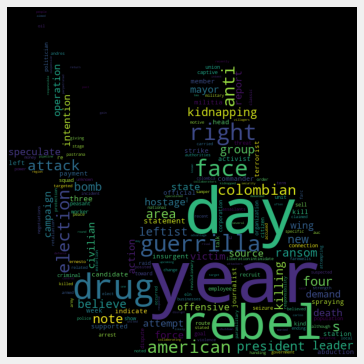

In [30]:
import nltk
from wordcloud import WordCloud, STOPWORDS
motive= df_colombia['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
f1=open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle,'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

## <a id='5.'>5. Outlier Detection</a>

In [31]:
def detect_outlier(df_outlier, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df_outlier[c],25)
        # 3rd quartile
        Q3 = np.percentile(df_outlier[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df_outlier[(df_outlier[c] < Q1 - outlier_step) | (df_outlier[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [32]:
df_colombia.loc[detect_outlier(df_colombia,["killed", "wounded"])]

,year,month,day,countryName,city,latitude,longitude,attackType,killed,wounded,target,summary,group,targetType,weaponType,motive


* We have no outliers.

## <a id='6.'>6. Missing Values</a>

In [33]:
df_colombia_len = len(df_colombia)
df_colombia_len

8306

## <a id='6.1.'>6.1. Finding Missing Values</a>

In [34]:
df_colombia.columns[df_colombia.isnull().any()]

Index(['latitude', 'longitude', 'killed', 'wounded', 'target', 'summary',
       'motive'],
      dtype='object')

In [35]:
df_colombia.isnull().sum()

year              0
month             0
day               0
countryName       0
city              0
latitude        471
longitude       471
attackType        0
killed          458
wounded         584
target           17
summary        5993
group             0
targetType        0
weaponType        0
motive         6757
dtype: int64

## <a id='6.2.'>6.2. Filling Missing Values</a>
* Latitude and longtitude have 471 missing values. Global position can effect the type of weapon that used in the act. 

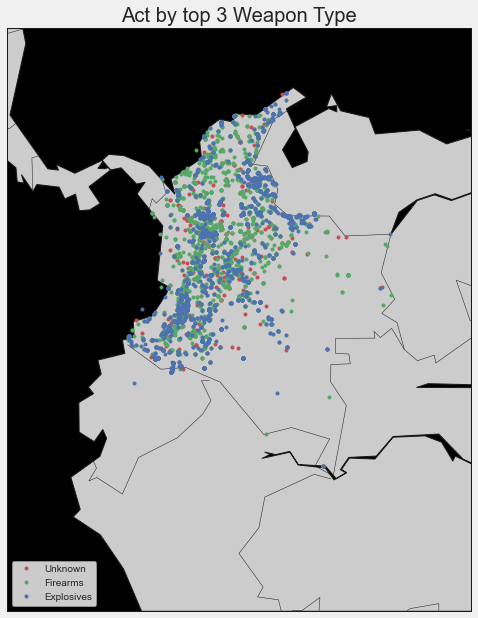

In [36]:
top_groups=df_colombia[df_colombia['weaponType'].isin(df_colombia['weaponType'].value_counts()[:3].index)]
m3 = Basemap(projection='mill',llcrnrlon=-84,llcrnrlat=-10,urcrnrlon=-64,urcrnrlat=15, resolution='c', lat_0=True,lat_1=True)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='black')
m3.drawmapboundary(fill_color='black')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
WeaponType=list(top_groups['weaponType'].unique())
def group_point(WeaponType,color,label):
    lat_group=list(top_groups[top_groups['weaponType']== WeaponType].latitude)
    long_group=list(top_groups[top_groups['weaponType']== WeaponType].longitude)
    x_group,y_group=m3(long_group,lat_group)
    m3.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(WeaponType,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Act by top 3 Weapon Type')
plt.show()

* It seems from the map that we can not distinguish the geographic positions according to the weapon type. 

In [37]:
df_colombia.group[df_colombia["latitude"].isnull()]

1690      National Liberation Army of Colombia (ELN)
2048      National Liberation Army of Colombia (ELN)
2875      National Liberation Army of Colombia (ELN)
2941      National Liberation Army of Colombia (ELN)
4299                                         Unknown
                             ...                    
171285    National Liberation Army of Colombia (ELN)
171286    National Liberation Army of Colombia (ELN)
171287    National Liberation Army of Colombia (ELN)
171288    National Liberation Army of Colombia (ELN)
171289    National Liberation Army of Colombia (ELN)
Name: group, Length: 471, dtype: object

* It seems we cannot have any insight about the latitide and longtitude. 

In [38]:
df_colombia["latitude"] = df_colombia["latitude"].fillna(0.0)

In [39]:
df_colombia["latitude"] = df_colombia["latitude"].fillna(0.0)

* There are 458 nan killed and 584 nan wounded cells. I make them 0.

In [40]:
df_colombia["killed"] = df_colombia["killed"].fillna(0.0)
df_colombia["wounded"] = df_colombia["wounded"].fillna(0.0)

* There are nan values in summary and motive features. I will ignore them because I will not use them in the model.

## <a id='7.'>7. Feature Engineering</a>

In [41]:
df_colombia.columns

Index(['year', 'month', 'day', 'countryName', 'city', 'latitude', 'longitude',
       'attackType', 'killed', 'wounded', 'target', 'summary', 'group',
       'targetType', 'weaponType', 'motive'],
      dtype='object')

In [42]:
df_colombia.drop(["city","target","countryName","latitude", "longitude", "summary", "motive","month","day"], axis=1, inplace=True)

In [43]:
df_colombia.columns

Index(['year', 'attackType', 'killed', 'wounded', 'group', 'targetType',
       'weaponType'],
      dtype='object')

In [44]:
#YEAR
#df_colombia = pd.get_dummies(df_colombia,columns=["year"])
#df_colombia.head()

In [45]:
#CITY
#df_colombia = pd.get_dummies(df_colombia,columns=["city"])
#df_colombia.head()

In [46]:
#ATTACK TYPE
df_colombia = pd.get_dummies(df_colombia,columns=["attackType"])
df_colombia.head()

,year,killed,wounded,group,targetType,weaponType,attackType_Armed Assault,attackType_Assassination,attackType_Bombing/Explosion,attackType_Facility/Infrastructure Attack,attackType_Hijacking,attackType_Hostage Taking (Barricade Incident),attackType_Hostage Taking (Kidnapping),attackType_Unarmed Assault,attackType_Unknown
405,1970,0.0,0.0,Unknown,Government (General),Unknown,0,0,0,0,0,0,1,0,0
1392,1972,1.0,0.0,Unknown,Government (Diplomatic),Firearms,0,1,0,0,0,0,0,0,0
1640,1972,0.0,0.0,National Liberation Army of Colombia (ELN),Educational Institution,Unknown,0,0,0,0,0,0,1,0,0
1690,1973,0.0,0.0,National Liberation Army of Colombia (ELN),Business,Unknown,0,0,0,0,0,0,1,0,0
1697,1973,0.0,0.0,Popular Liberation Army (EPL),Business,Unknown,0,0,0,0,0,0,1,0,0


In [47]:
#TARGET Type
df_colombia = pd.get_dummies(df_colombia,columns=["targetType"])
df_colombia.head()

,year,killed,wounded,group,weaponType,attackType_Armed Assault,attackType_Assassination,attackType_Bombing/Explosion,attackType_Facility/Infrastructure Attack,attackType_Hijacking,...,targetType_Police,targetType_Private Citizens & Property,targetType_Religious Figures/Institutions,targetType_Telecommunication,targetType_Terrorists/Non-State Militia,targetType_Tourists,targetType_Transportation,targetType_Unknown,targetType_Utilities,targetType_Violent Political Party
405,1970,0.0,0.0,Unknown,Unknown,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1392,1972,1.0,0.0,Unknown,Firearms,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1640,1972,0.0,0.0,National Liberation Army of Colombia (ELN),Unknown,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1690,1973,0.0,0.0,National Liberation Army of Colombia (ELN),Unknown,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,1973,0.0,0.0,Popular Liberation Army (EPL),Unknown,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Group
df_colombia = pd.get_dummies(df_colombia,columns=["group"])
df_colombia.head()

,year,killed,wounded,weaponType,attackType_Armed Assault,attackType_Assassination,attackType_Bombing/Explosion,attackType_Facility/Infrastructure Attack,attackType_Hijacking,attackType_Hostage Taking (Barricade Incident),...,group_Students,group_Supporters of presidential candidate Belisario Bet,group_The Extraditables,group_Tupac Amaru Revolutionary Movement (MRTA),group_Unified Workers Command,group_United Self Defense Units of Colombia (AUC),group_Unknown,group_Workers' Forces of Liberation,group_Workers' Self-Defense Movement (MAO),group_leftist guerrillas-Bolivarian militia
405,1970,0.0,0.0,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1392,1972,1.0,0.0,Firearms,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1640,1972,0.0,0.0,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1690,1973,0.0,0.0,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,1973,0.0,0.0,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* I will drop the cells in feature "weaponType" excluding "firearms" and "explosives" for exercising Logistic Regression Classification.

In [49]:
df = df_colombia[df_colombia["weaponType"].isin(["Firearms","Incendiary"])]

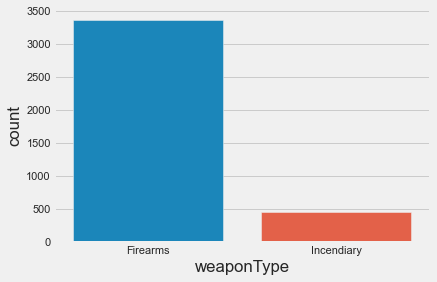

In [50]:
ax = sns.countplot(df["weaponType"],label="Count") 

In [51]:
df["weaponType"] = [1 if i == "Firearms" else 0 for i in df["weaponType"]]

In [52]:
x = df.drop(["weaponType"], axis=1)
y = df["weaponType"]

## <a id='7.1.'>7.1. Over-sampling using SMOTE</a>

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns
os_data_x,os_data_y=os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  4704
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


Now there is a perfectly balanced data.  I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.